<a href="https://colab.research.google.com/github/Leonardo-Mendoza/1968723-Inteligencia-Artificial-y-redes-Neuronales/blob/main/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Leonardo Antonio Chavez Mendoza
# 1968723
# N4 008
# Actividad 9. Redes neuronales
# RNC

In [3]:
# PASO 1 - CARGAR LIBRERÍAS
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, datasets, models

print(tf.__version__)

2.17.0


In [4]:
# Visualizando set de datos
keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
# Paso 2: Cargar datos
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [6]:
# Preparando clases
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco',
               'Seis', 'Siete', 'Ocho', 'Nueve']

In [7]:
# Explorando imágenes de prueba
x_test.shape

(10000, 28, 28)

In [8]:
# Explorando imágenes de entrenamiento
x_train.shape

(60000, 28, 28)

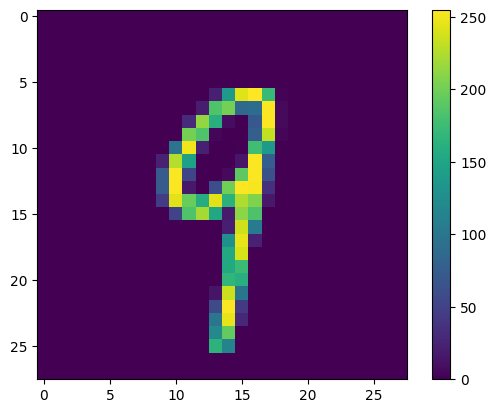

In [9]:
# Paso 3: Procesamiento de datos
plt.figure()
plt.imshow(x_train[900])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Escalando valores de imágenes
x_train = x_train / 255.0
x_test = x_test / 255.0

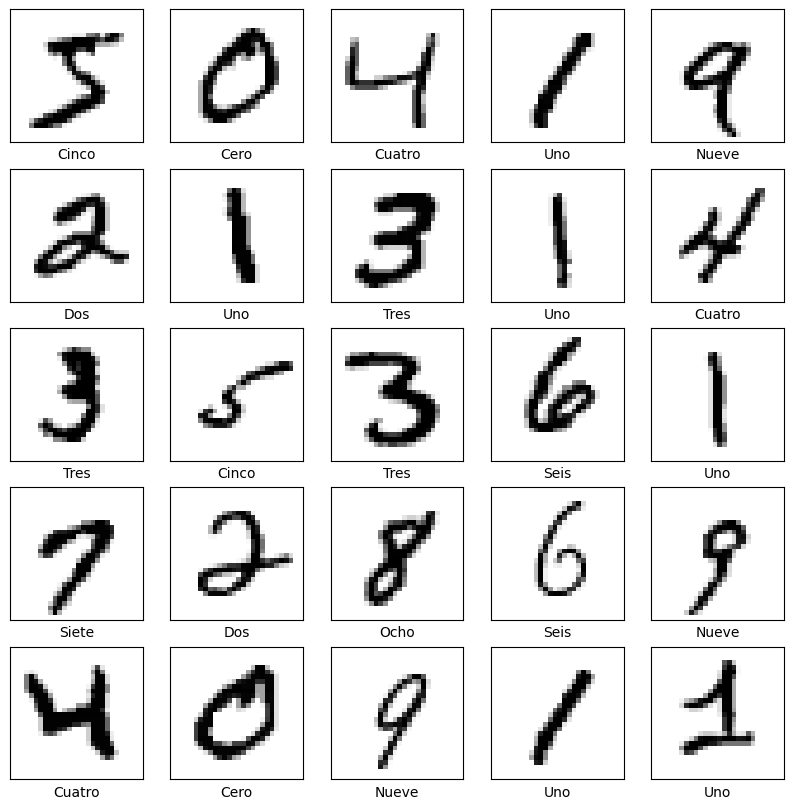

In [11]:
# Visualización de las primeras 25 imágenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    label_index = y_train[i]
    if 0 <= label_index < len(class_names):
        plt.xlabel(class_names[label_index])
    else:
        plt.xlabel(f"Unknown Label ({label_index})")
plt.show()

In [12]:
# Paso 4: Selección y entrenamiento del modelo
model = models.Sequential()
# Creación de la red neuronal convulcional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Visualización de la arquitectura del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Agregando capas
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [15]:
# Visualizando arquitectura completa
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compilación del modelo
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.9015 - loss: 0.3253 - val_accuracy: 0.9865 - val_loss: 0.0466
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9857 - loss: 0.0438 - val_accuracy: 0.9882 - val_loss: 0.0352
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9901 - loss: 0.0314 - val_accuracy: 0.9869 - val_loss: 0.0420
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9925 - loss: 0.0213 - val_accuracy: 0.9907 - val_loss: 0.0313
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9940 - loss: 0.0179 - val_accuracy: 0.9870 - val_loss: 0.0388
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9961 - loss: 0.0132 - val_accuracy: 0.9910 - val_loss: 0.0324
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 37ms/step - accuracy: 0.9972 - loss: 0.0102 - val_accuracy: 0.9919 - val_loss: 0.0300
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 31ms/step - accuracy: 0.9967 -

313/313 - 2s - 7ms/step - accuracy: 0.9912 - loss: 0.0362


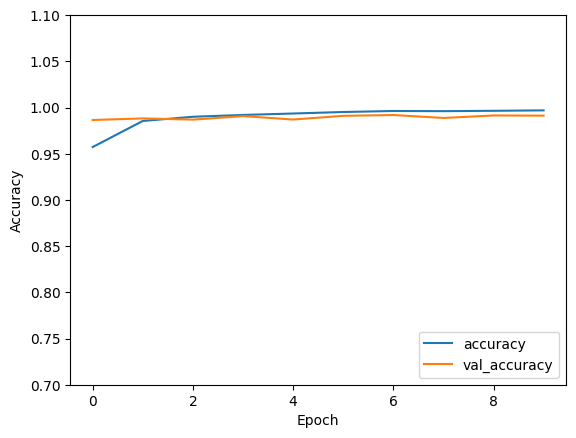

In [17]:
# Evaluación del modelo
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [18]:
# Evaluación de exactitud de la red neuronal
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nExactitud del modelo en datos de prueba: {test_acc}")

313/313 - 3s - 10ms/step - accuracy: 0.9912 - loss: 0.0362

Exactitud del modelo en datos de prueba: 0.9911999702453613


In [19]:
# Paso 5: Prueba del modelo
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [20]:
# Función para visualización de imágenes de resultado
def plot_image(i, predictions_array, y_test, img):
  predictions_array, true_label, img = predictions_array, y_test[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [21]:
# Prueba 1
# Resultados de la imagen 100(Probabilidades de los números que pueden ser)
predictions[100]

array([1.9277057e-14, 9.2284260e-14, 2.8700467e-16, 4.6596935e-19,
       6.9444011e-13, 2.0572042e-11, 9.9999994e-01, 4.0099086e-20,
       5.5126879e-11, 3.5373353e-16], dtype=float32)

In [22]:
np.argmax(predictions[100])

6

In [23]:
# ¿Qué número es?
y_test[100]

6

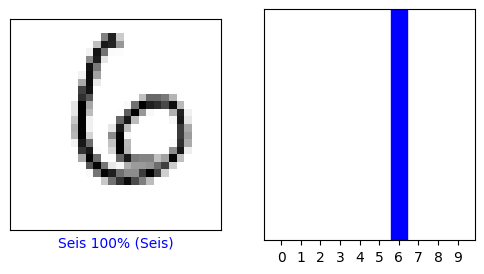

In [24]:
# Resultado de la imagen 100
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [25]:
# Prueba 2
# Resultados de la última imagen(Probabilidades de los números que pueden ser)
predictions[-1]

array([1.1398949e-14, 6.5067981e-13, 2.6461405e-12, 9.2985176e-14,
       7.9710449e-14, 1.6746748e-08, 9.9999994e-01, 2.7165980e-18,
       7.0853878e-11, 4.0792346e-17], dtype=float32)

In [26]:
np.argmax(predictions[-1])

6

In [28]:
# ¿Qué número es?
y_test[-1]

6

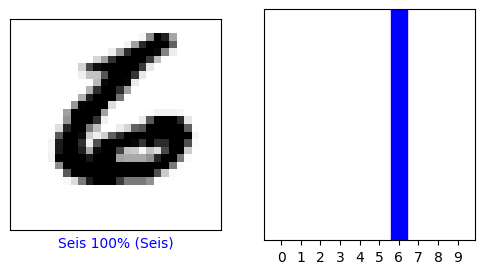

In [27]:
# Resultado de la última imagen
i = -1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [29]:
# Prueba 3
# Resultados de la primer imagen(Probabilidades de los números que pueden ser)
predictions[1]

array([2.2635958e-13, 3.6790525e-13, 9.9999994e-01, 1.1758855e-15,
       1.1364475e-14, 8.5845631e-18, 4.3381576e-10, 3.3873260e-12,
       1.3690921e-15, 9.8002467e-19], dtype=float32)

In [30]:
np.argmax(predictions[1])

2

In [31]:
# ¿Qué número es?
y_test[1]

2

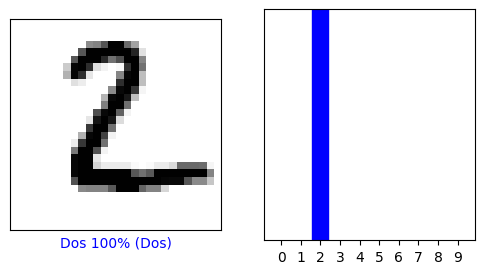

In [32]:
# Resultado de la primer imagen
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [33]:
# Prueba 4
# Resultados de la imagen 5000(Probabilidades de los números que pueden ser)
predictions[5000]

array([3.56236478e-21, 2.05015345e-11, 4.81968686e-13, 9.99999940e-01,
       1.13732734e-15, 2.80264723e-09, 4.64607866e-12, 1.70169000e-11,
       1.16412144e-10, 1.88702081e-13], dtype=float32)

In [34]:
np.argmax(predictions[5000])

3

In [35]:
# ¿Qué número es?
y_test[5000]

3

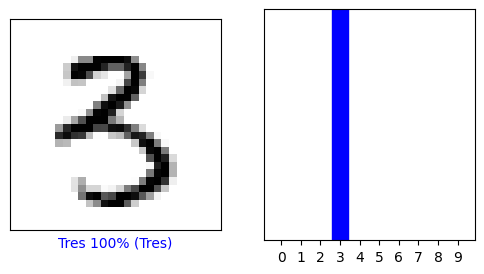

In [36]:
# Resultado de la imagen 5000
i = 5000
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [38]:
# Prueba 5
# Resultados de la imagen 857(Probabilidades de los números que pueden ser)
predictions[857]

array([1.03631444e-16, 2.98361986e-12, 4.75274240e-18, 7.93880031e-11,
       1.13362390e-15, 9.99999940e-01, 1.83469254e-10, 1.36998474e-16,
       1.14400517e-10, 3.97644556e-11], dtype=float32)

In [39]:
np.argmax(predictions[857])

5

In [40]:
# ¿Qué número es?
y_test[857]

5

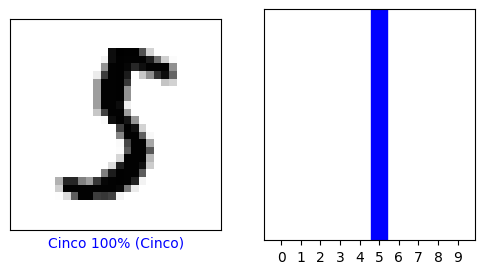

In [41]:
# Resultado de la imagen 1358
i = 857
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [42]:
# Preguntas
'''
¿Cuántas épocas usaste para mejorar el rendimiento del modelo
en comparación con la red neuronal prealimentada de la actividad 5?
'''
 # Se usaron 10 épocas


'''
¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5?
'''
# Si

'''
¿Por qué?
'''
# Pueden ser muchos factores, ya sea por las capas de las redes
# También puede ser por el tipo de aprendizaje utilizado
# Por la arquitectura de la red


'\n¿Por qué?\n'